# Capstone Analytic Report
## Apple App Store Dataset
 
### Dataset Description

In [101]:
# Make code toggle-able for easier review.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a></i>.''')

This dataset from Kaggle provides information on over 7,000 mobile apps in Apple's App Store scraped from Apple's iTunes Search API in July 2017. Data points include app name, size, price, ratings information, genre, and others.

Being a business consultant that works with a lot of startups, many of whom have mobile apps in Apple's App Store, I can learn a lot from this dataset. This information can play a significant role in learning where the benchmarks for success are located, what potential pitfalls to avoid, as well as helpful strategic tips to be successful in the world of mobile apps.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's take a look at the first few rows of the data to see what we're working with.

In [103]:
data = pd.read_csv('AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


### Basic Statistics from Dataset 

Let's see some basic information about the data.

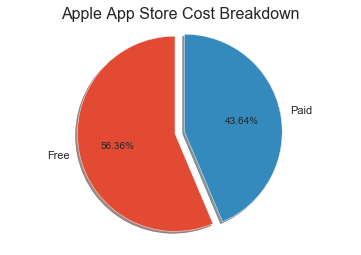

In [104]:
# Let's see the breakdown of Free vs Paid apps

# Add a new column called 'Charge' that indicates if the app is free or requires payment
data['Charge'] = np.where(data['price']>0, 'Paid', 'Free')

# Sort the data by splitting the rows into to categories: Free and Paid
cost = data.groupby('Charge').aggregate(np.count_nonzero)

# Add count and ratio columns
cost['Count'] = cost.id
cost['Ratio'] = cost.id / cost.id.sum()

# Only view pertinent columns
cost_only = cost.loc[:, ['Count', 'Ratio']]

# Create a pie chart of this data
labels = cost_only.index.str.title()
sizes = cost_only['Ratio']
explode = (0, 0.1)

# Specify data formats
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal')

# Title the graph
plt.title('Apple App Store Cost Breakdown', fontsize=16)

plt.show()

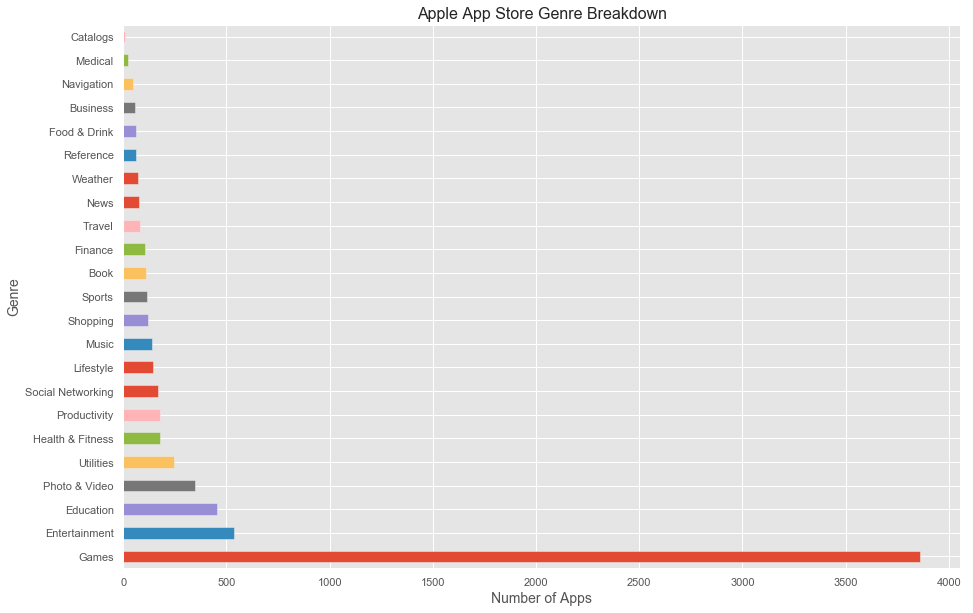

In [105]:
# Let's see the breakdown of apps per genre

# Pull counts for each genre
categories = data.groupby('prime_genre').aggregate(np.count_nonzero)

# Add count and ratio columns
categories['Count'] = categories.id
categories['Ratio'] = categories.id / categories.id.sum()

# Only view pertinent rows and columns of the data
genres = categories.loc[:, ['Count', 'Ratio', 'Charge']]

# Sort the rows in descending order
genres_sort = genres.sort_values('Count', ascending=False)

# Let's make the bar graph
fig = plt.figure(figsize=(15,10))
genres_sort.Count.plot.barh()
plt.title('Apple App Store Genre Breakdown', fontsize=16)
plt.ylabel('Genre', fontsize=14)
plt.xlabel('Number of Apps', fontsize=14)
plt.show()

### Analytical Questions

Looking at this dataset, let's try to learn some information that can help assist future app developers:

1) We learned above that the overall ratio of Free vs. Paid apps is approximately 56% / 44% respectively. Does this apply to all genres equally or does this ratio vary?

2) Once we see how Free and Paid apps split, is there a relationship between App Price and App Size (in megabytes)?

3) Considering the Paid/Free distinction, are users more likely to rate free apps or paid apps, and how does that look across all genres?

Let's take a look:

In [106]:
# Make new dataframes for the Free apps, Paid apps, and a new Total dataframe
free = data[data.price == 0].prime_genre.value_counts().sort_index().to_frame()
paid = data[data.price > 0].prime_genre.value_counts().sort_index().to_frame()
total = data.prime_genre.value_counts().sort_index().to_frame()

# Name the columns we just made
free.columns = ['free']
paid.columns = ['paid']
total.columns = ['total']

# Create a new dataframe that lists the above columns and add ratio percentages
genre_fee = free.join(paid).join(total)
genre_fee ['paid_per'] = genre_fee.paid * 100 / genre_fee.total
genre_fee ['free_per'] = genre_fee.free * 100 / genre_fee.total

# Sort the Free_Per column in descending order
genre_fee_sort = genre_fee.sort_values('free_per', ascending=False)

# Create lists and tuples for the values in the dataframe to enable plotting
list_free = genre_fee_sort.free_per.tolist()
tuple_free = tuple(list_free)
tuple_paidapps = tuple(genre_fee_sort.paid_per.tolist())

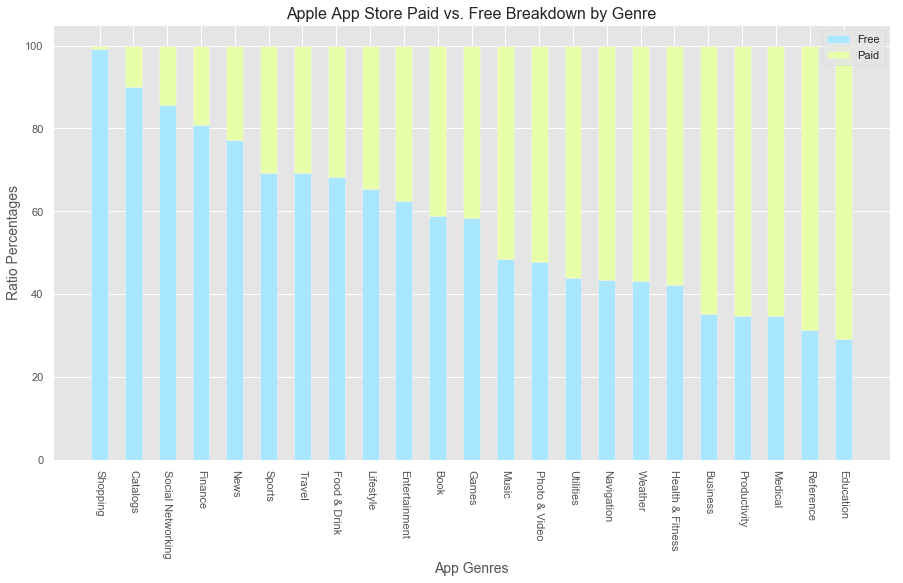

In [107]:
# Make a bar plot that combines both the free and paid ratios

# Size of the plot
plt.figure(figsize = (15,8))

# N = Quantity of genre bins
N = 23

# The values for the x axis
ind = np.arange(N)

# The width of the bins
width =0.5

# The values for each dataset for the bar plot
p1 = plt.bar(ind, tuple_free, width, color = '#a8e7ff')
p2 = plt.bar(ind, tuple_paidapps, width, bottom = tuple_free, color = '#e7ffa8')
plt.xticks(ind, tuple(genre_fee_sort.index.tolist()))
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))
plt.xticks(rotation = 270)

# Name the axes and the plot
plt.title('Apple App Store Paid vs. Free Breakdown by Genre', fontsize=16)
plt.ylabel('Ratio Percentages', fontsize=14)
plt.xlabel('App Genres', fontsize=14)

# Display the plot
plt.show()

It looks like the Free/Paid ratio we saw overall does not accurately reflect most genres. We see a high in the Shopping genre with a Free/Paid ratio of 99.18% and 0.82% respectively, and a low in the Education genre with a Free/Paid ratio of 29.14% and 70.86% respectively. 

Now that we know the split of Free vs. Paid apps per genre, is there any relationship between App Price and App Size (in megabytes)?

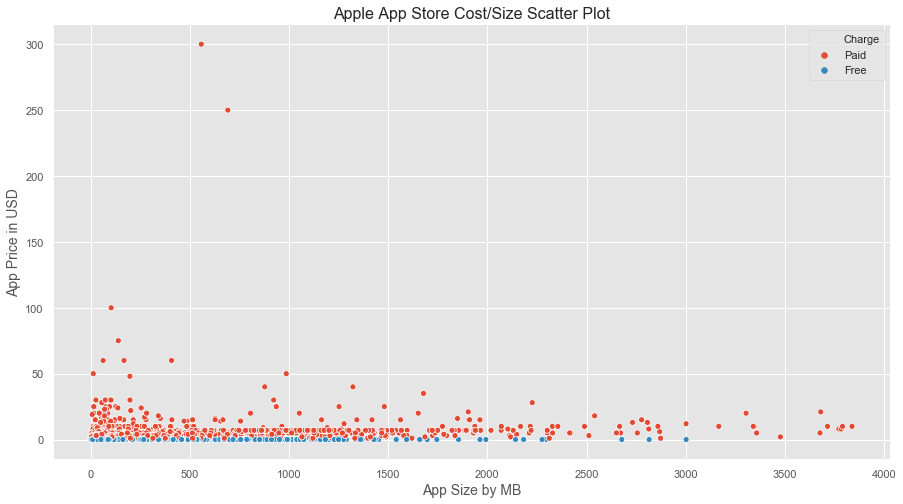

In [108]:
# Create a new column converting App Size from Bytes to Megabytes
data['MB'] = data.size_bytes.apply(lambda x : x/1048576)

# Specify the axes of the scatterplot
x = data.MB
y = data.price

# Size of the plot
plt.figure(figsize = (15,8))

sns.scatterplot(x=x, y=y, hue=data.Charge)

# Name the axes and the plot
plt.title('Apple App Store Cost/Size Scatter Plot', fontsize=16)
plt.xlabel('App Size by MB', fontsize=14)
plt.ylabel('App Price in USD', fontsize=14)

plt.show()

As we can see from the scatterplot above, there appears to be no real relationship between App Price and App Size. If there were a relationship, the blue dots would appear in a diagonal line from the bottom left corner of the plot to the top right corner, with the orange dots all congregating in the bottom left corner of the scatterplot. Interestingly enough, it appears that the most expensive apps in the dataset all happen to find themselves in the two smallest App Size bins.

Lastly, let's take a look and see if are users more likely to rate free apps or paid apps, and how that looks across all genres.

In [109]:
# Create a pivot table splitting the dataset by genre and fee, using rating_count_tot values
ratings = pd.pivot_table(data, values='rating_count_tot', index='prime_genre', columns='Charge', aggfunc='sum')
ratings['Total Ratings'] = ratings['Free'] + ratings['Paid']

# Sort the Total Ratings column in descending order
ratings_sort = ratings.sort_values(by=['Total Ratings'])

ratings_no_games = ratings_sort.iloc[0:22, :]

Text(0.5,0,'App Genres')

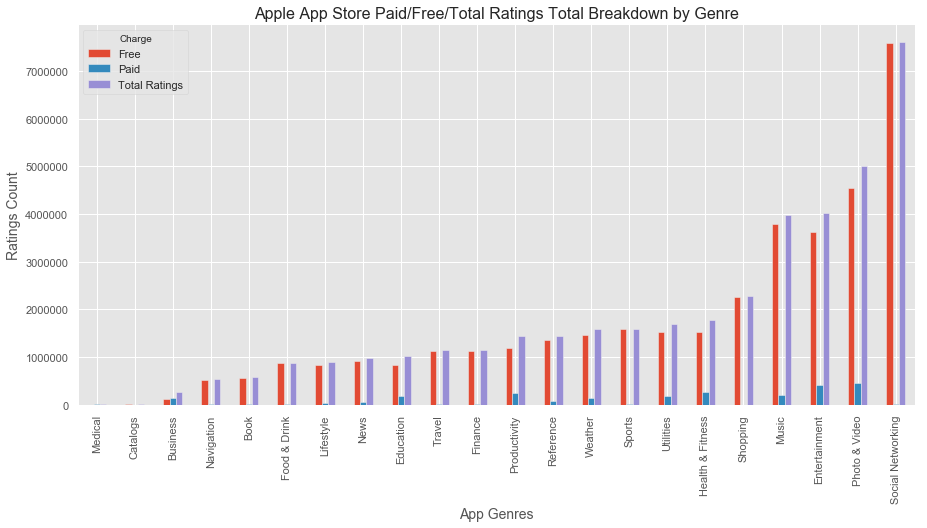

In [110]:
# Size of the plot
plt.rcParams["figure.figsize"] = "15, 7"

# Create a bar plot for Ratings Count pivot table
plt.style.use('ggplot')
ratings_no_games.plot(kind = 'bar')

# Name the axes and the plot
plt.title('Apple App Store Paid/Free/Total Ratings Total Breakdown by Genre', fontsize=16)
plt.ylabel('Ratings Count', fontsize=14)
plt.xlabel('App Genres', fontsize=14)

In creating this plot, it became apparent that the Games genre was abnormally larger than the rest with 42,713,023 ratings on Free Apps, 10,165,468 ratings on Paid Apps, and 52,878,491 Total Ratings, which is over 5 times larger than the next largest genre. To better visualize the remaining genres, I removed the Games genre from the plot.

As the above bar chart shows quite a strong manner, nearly all app ratings are made on free apps. The ratings count for paid apps are barely visible.

### Proposed Further Research 

Analyzing this dataset I found that some valuable datapoints were not collected. Adding App Downloads, Monthly Active Users, User Age statistics, App Development Costs and App Revenue columns would contribute tremendous insight into the Apple App Store industry.

What I would like to analyze in the future is to find correlations between the apps with the most ratings to try and see if there is some formula that can be developed through machine learning or collective intelligence to create the perfect Apple App Store App. I would also like to conduct comparison analytics on Google Play Store apps to see if there is some insight that would come to the surface about the psychology of Apple users and Android users.

I would really love to learn how to cluster data to better analyze and make more targeted insights on smaller sets of the data. For example, if the dataset included information on User Age and Average Revenue Per User, these datapoints could be clustered to learn a lot about the world of iOS app development.